# Import Library

In [ ]:
import tensorflow as tf
import numpy as np
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
%matplotlib inline

from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from keras.preprocessing import image


from google.colab import files

# Get Data

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-08 09:39:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.33MB/s    in 78s     

2021-07-08 09:41:18 (3.94 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# Extract and Load Data

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

rootdir = '/tmp/rockpaperscissors/rps-cv-images'


# Data Preprocessing

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    vertical_flip=True,
                    zoom_range = 0.2,
                    fill_mode ='wrap',
                    shear_range = 0.2,
                    validation_split = 0.4 #validation 40%
                    )

In [ ]:
train_generator = datagen.flow_from_directory(
        rootdir,  
        target_size=(100,150),
        class_mode="categorical",
        subset='training')

val_generator = datagen.flow_from_directory(
        rootdir,  
        target_size=(100,150),
        class_mode="categorical",
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

# Modelling

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 256)        2

In [ ]:
steps_epoch = train_generator.n//train_generator.batch_size
steps_val =val_generator.n//val_generator.batch_size

In [ ]:
accuracy_threshold = 0.98
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nPada epoch ke', epoch, '\nAkurasi mencapai = %2.2f%%' %(logs['accuracy']*100), 'training telah berhenti.')
            self.model.stop_training = True

In [ ]:
history = model.fit(train_generator,
                    epochs=25,
                    validation_data=val_generator,
                    steps_per_epoch=steps_epoch,
                    validation_steps=steps_val,
                    callbacks = [my_callbacks()])

Epoch 1/25
41/41 [==============================] - 59s 1s/step - loss: 1.0643 - accuracy: 0.4462 - val_loss: 0.8824 - val_accuracy: 0.5671
Epoch 2/25
41/41 [==============================] - 57s 1s/step - loss: 0.6023 - accuracy: 0.7301 - val_loss: 0.4219 - val_accuracy: 0.8553
Epoch 3/25
41/41 [==============================] - 56s 1s/step - loss: 0.3888 - accuracy: 0.8463 - val_loss: 0.3461 - val_accuracy: 0.8715
Epoch 4/25
41/41 [==============================] - 57s 1s/step - loss: 0.3045 - accuracy: 0.8869 - val_loss: 0.2700 - val_accuracy: 0.9086
Epoch 5/25
41/41 [==============================] - 57s 1s/step - loss: 0.2813 - accuracy: 0.8939 - val_loss: 0.2853 - val_accuracy: 0.8993
Epoch 6/25
41/41 [==============================] - 57s 1s/step - loss: 0.2546 - accuracy: 0.9048 - val_loss: 0.3194 - val_accuracy: 0.8924
Epoch 7/25
41/41 [==============================] - 56s 1s/step - loss: 0.1842 - accuracy: 0.9353 - val_loss: 0.1532 - val_accuracy: 0.9502
Epoch 8/25
41/41 [==

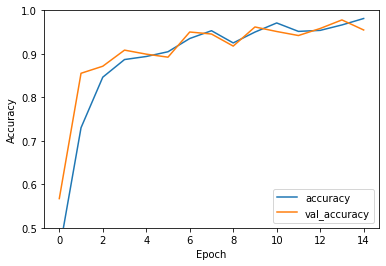

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Prediction

Saving WhatsApp Image 2021-07-08 at 12.18.58 AM (1) zoom.jpeg to WhatsApp Image 2021-07-08 at 12.18.58 AM (1) zoom (2).jpeg
Prediction:
Gambar WhatsApp Image 2021-07-08 at 12.18.58 AM (1) zoom.jpeg mirip dengan batu dengan tingkat kepercayaan 57.61%.


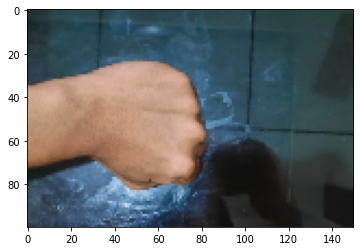

In [ ]:
uploaded = files.upload()
class_names = ['kertas','batu','gunting']
for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  pred = model.predict(images)
  score = tf.nn.softmax(pred[0])

  print("Prediction:")
  print(f"Gambar {fn} mirip dengan {class_names[np.argmax(score)]} dengan tingkat kepercayaan {round(100 * np.max(score),2)}%.")